<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.509015,66.869544,55.164588,-0.000747,182.542399,182.543872,-0.001473
1,0.0,1.0,36.866239,39.850374,22.310089,-0.001941,109.024760,109.028236,-0.003476
2,0.0,2.0,72.684195,41.403978,51.216071,0.003286,175.307530,175.305176,0.002354
3,0.0,3.0,56.433893,46.335735,28.116635,0.011093,140.897356,140.887428,0.009928
4,0.0,4.0,36.408130,64.546477,21.704459,0.002865,132.661930,132.660183,0.001747
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.893724,78.178997,55.447499,-0.003205,234.517015,234.519659,-0.002645
249996,999.0,246.0,29.278118,65.719327,57.635642,-0.002665,162.630422,162.633919,-0.003497
249997,999.0,247.0,36.109917,50.769099,87.397088,0.009677,184.285782,184.276967,0.008815
249998,999.0,248.0,34.609903,55.055414,74.926277,-0.000108,174.591486,174.592393,-0.000907


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.509015,66.869544,55.164588,-0.000747,182.542399,182.543872,-0.001473
1,0.0,1.0,36.866239,39.850374,22.310089,-0.001941,109.024760,109.028236,-0.003476
2,0.0,2.0,72.684195,41.403978,51.216071,0.003286,175.307530,175.305176,0.002354
3,0.0,3.0,56.433893,46.335735,28.116635,0.011093,140.897356,140.887428,0.009928
4,0.0,4.0,36.408130,64.546477,21.704459,0.002865,132.661930,132.660183,0.001747
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.893724,78.178997,55.447499,-0.003205,234.517015,234.519659,-0.002645
249996,999.0,246.0,29.278118,65.719327,57.635642,-0.002665,162.630422,162.633919,-0.003497
249997,999.0,247.0,36.109917,50.769099,87.397088,0.009677,184.285782,184.276967,0.008815
249998,999.0,248.0,34.609903,55.055414,74.926277,-0.000108,174.591486,174.592393,-0.000907


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.509015  66.869544  55.164588  ...  182.542399  182.543872 -0.001473
      1.0    36.866239  39.850374  22.310089  ...  109.024760  109.028236 -0.003476
      2.0    72.684195  41.403978  51.216071  ...  175.307530  175.305176  0.002354
      3.0    56.433893  46.335735  28.116635  ...  140.897356  140.887428  0.009928
      4.0    36.408130  64.546477  21.704459  ...  132.661930  132.660183  0.001747
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.893724  78.178997  55.447499  ...  234.517015  234.519659 -0.002645
      246.0  29.278118  65.719327  57.635642  ...  162.630422  162.633919 -0.003497
      247.0  36.109917  50.769099  87.397088  ...  184.285782  184.276967  0.008815
      248.0  34.609903  55.055414  74.926277  ...  174.591486  174.592393 -0.000907
      249.0  51.034598  69.297150  54.727890  ...  185.054429  185.059947 -0.005519

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.509015  66.869544  55.164588  ...  182.542399  182.543872 -0.001473
      1.0    36.866239  39.850374  22.310089  ...  109.024760  109.028236 -0.003476
      2.0    72.684195  41.403978  51.216071  ...  175.307530  175.305176  0.002354
      3.0    56.433893  46.335735  28.116635  ...  140.897356  140.887428  0.009928
      4.0    36.408130  64.546477  21.704459  ...  132.661930  132.660183  0.001747
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.893724  78.178997  55.447499  ...  234.517015  234.519659 -0.002645
      246.0  29.278118  65.719327  57.635642  ...  162.630422  162.633919 -0.003497
      247.0  36.109917  50.769099  87.397088  ...  184.285782  184.276967  0.008815
      248.0  34.609903  55.055414  74.926277  ...  174.591486  174.592393 -0.000907
      249.0  51.034598  69.297150  54.727890  ...  185.054429  185.059947 -0.005519

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.509015,66.869544,55.164588,-0.000747,182.542399,182.543872,-0.001473
1,0.0,1.0,36.866239,39.850374,22.310089,-0.001941,109.024760,109.028236,-0.003476
2,0.0,2.0,72.684195,41.403978,51.216071,0.003286,175.307530,175.305176,0.002354
3,0.0,3.0,56.433893,46.335735,28.116635,0.011093,140.897356,140.887428,0.009928
4,0.0,4.0,36.408130,64.546477,21.704459,0.002865,132.661930,132.660183,0.001747
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.893724,78.178997,55.447499,-0.003205,234.517015,234.519659,-0.002645
249996,999.0,246.0,29.278118,65.719327,57.635642,-0.002665,162.630422,162.633919,-0.003497
249997,999.0,247.0,36.109917,50.769099,87.397088,0.009677,184.285782,184.276967,0.008815
249998,999.0,248.0,34.609903,55.055414,74.926277,-0.000108,174.591486,174.592393,-0.000907


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.509015  66.869544  55.164588  ...  182.542399  182.543872 -0.001473
      1.0    36.866239  39.850374  22.310089  ...  109.024760  109.028236 -0.003476
      2.0    72.684195  41.403978  51.216071  ...  175.307530  175.305176  0.002354
      3.0    56.433893  46.335735  28.116635  ...  140.897356  140.887428  0.009928
      4.0    36.408130  64.546477  21.704459  ...  132.661930  132.660183  0.001747
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.893724  78.178997  55.447499  ...  234.517015  234.519659 -0.002645
      246.0  29.278118  65.719327  57.635642  ...  162.630422  162.633919 -0.003497
      247.0  36.109917  50.769099  87.397088  ...  184.285782  184.276967  0.008815
      248.0  34.609903  55.055414  74.926277  ...  174.591486  174.592393 -0.000907
      249.0  51.034598  69.297150  54.727890  ...  185.054429  185.059947 -0.005519

[250000 rows x 7 columns]

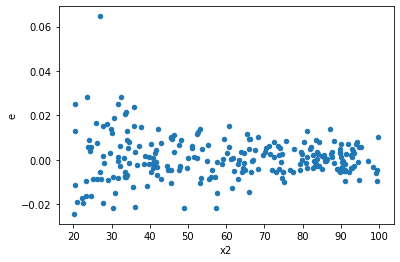

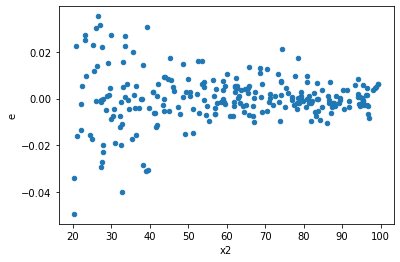

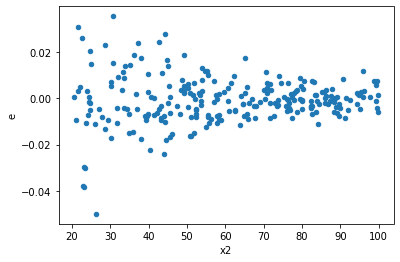

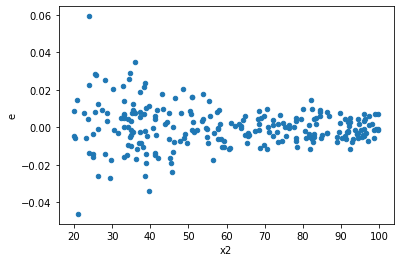

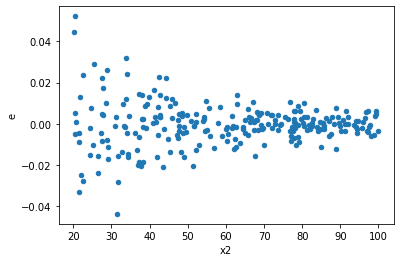

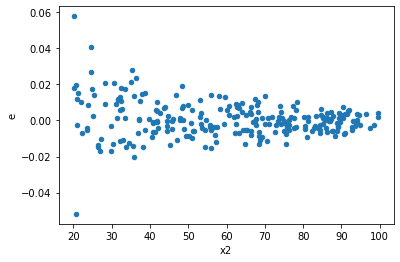

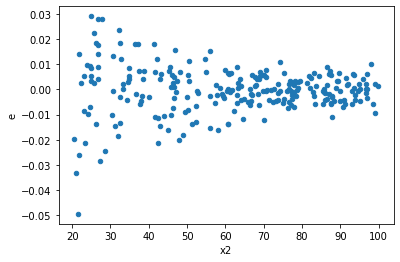

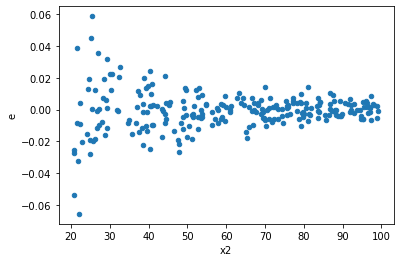

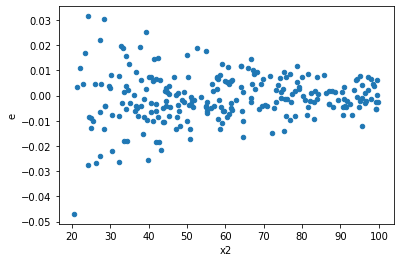

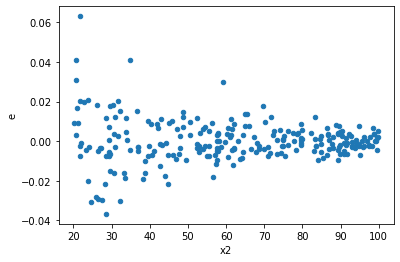

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.017536881766191594,0.0025575892450587254,0.00018079259552774838,2.6366899433595106e-05,0.14584059350787,8.80125363741597e-19,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.025996198574099436,0.002972780253150256,0.0002680020471556643,3.064721910464181e-05,0.11435442165425293,9.30229297082748e-23,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.021537520505634514,0.0021730668505455736,0.00022203629387252077,2.2402751036552305e-05,0.10089679775241858,6.7881246321495715e-25,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.024758850671117546,0.002939885634983984,0.0002552458832073974,3.0308099329731792e-05,0.11874079592933243,3.978006296340606e-22,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.022976279450581675,0.0020039372922299376,0.000236868860315275,2.0659147342576677e-05,0.08721765839156372,1.897097727430405e-27,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.01818497540012038,0.0023260744919757696,0.00018747397319711733,2.398014940181206e-05,0.1279118855426316,6.770837984483824e-21,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.018932727682786754,0.0018654160079396565,0.0001951827596163583,1.9231092865357283e-05,0.09852864516905581,2.631350166690207e-25,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.03194947923472967,0.00226333923765342,0.0003293760745848419,2.3333394202612578e-05,0.07084119340490311,3.334910125033058e-31,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.016473227824204538,0.0032622449576536557,0.0001698270909711808,3.363139131601707e-05,0.1980331354891089,3.603453457461861e-14,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64